# Delay Scan -  DESC fringes on ExitScreen

In [1]:
import h5py;
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image

DAQ run with delay scan

/asap3/fs-flash-o/gpfs/camp/2019/data/11007673/raw/hdf/by-run/FLASH1_USER1-run28496.h5
Delay Scan: 32 steps ?


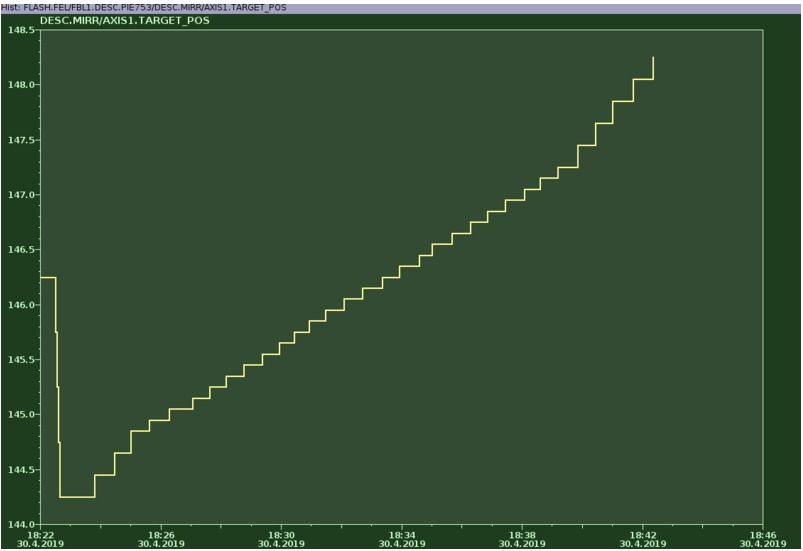

In [2]:
runNumber = 28496

dataDir = '/asap3/fs-flash-o/gpfs/camp/2019/data/11007673/raw/hdf/by-run/'
hdfFilename = 'FLASH1_USER1-run'+str(runNumber)+'.h5'
imagePath = '/asap3/flash/gpfs/bl1/2017/data/11003895/processed/notebooks/fig/'

print(dataDir+hdfFilename)
print('Delay Scan: 32 steps ?')
Image("delaymotor_history.jpeg")

### Read motor position

<class 'numpy.ndarray'> | (13200, 1)


/software/anaconda3/5.2/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


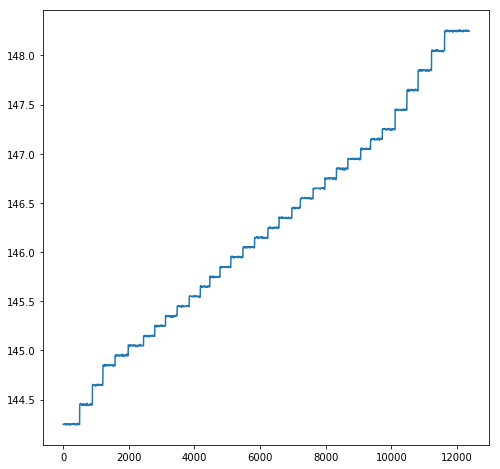

In [13]:
motorPos = hdfFile['/FL1/Experiment/BL1/CAMP/DESC/Fine delay stage/position'].value
print(type(motorPos),'|', motorPos.shape)
plt.figure(figsize=(8,8))
plt.plot(motorPos)

### Check Motor Position for NaNs

Number of NaNs: 831


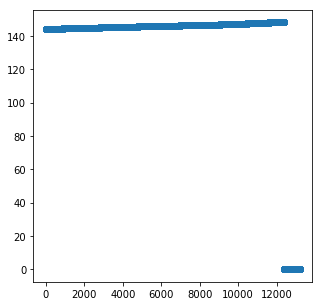

In [55]:
motorPosWoNaN = np.nan_to_num(motorPos)
plt.figure(figsize=(5,5))
plt.plot(motorPosWoNaN,'o')

NoNans = (motorPosWoNaN>1)
res2 = [i for i, val in enumerate(NoNans) if val]
print('Number of NaNs:',len(motorPos)-len(res2))

### Read Images from h5 file 

In [14]:
hdfFile = h5py.File(dataDir+hdfFilename,'r')
img = hdfFile['/uncategorised/FLASH1_USER1/FLASH.FEL/FBL1.CAM/EXIT_SCREEN/dset'].value
print(type(img),'|',img.shape)

<class 'numpy.ndarray'> | (13200, 1280, 960)


/software/anaconda3/5.2/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


### Define ROI & Calculate Integral of ROI for all Images

In [39]:
ROI_x1, ROI_y1 = 200, 100
ROI_x2, ROI_y2 = 700, 700

integral = np.asarray([np.sum(img[index][ROI_x1:ROI_x2,ROI_y1:ROI_y2]) for index in range(0,img.shape[0])])

### Plot Blank Images & Delay Steps

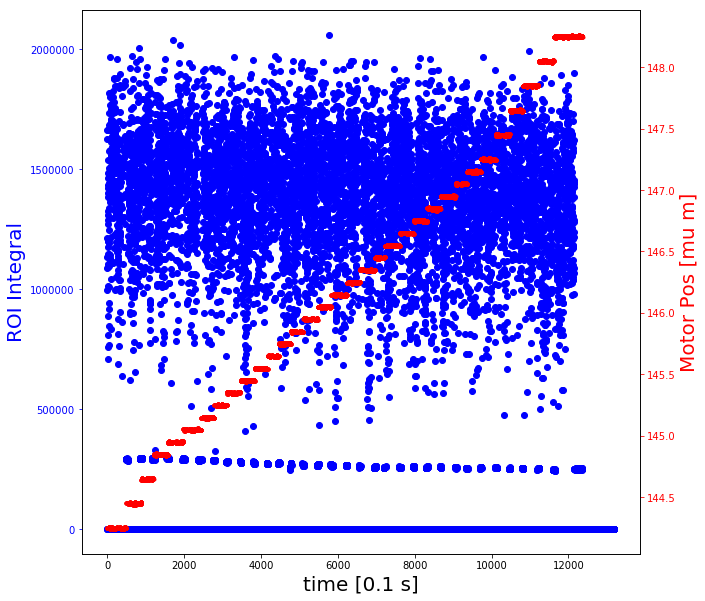

In [40]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(integral,'bo')
ax1.set_xlabel('time [0.1 s]',fontsize=20)
ax1.set_ylabel('ROI Integral', color='b', fontsize=20)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(motorPos,'r.')
ax2.set_ylabel('Motor Pos [mu m]', color='r', fontsize=20)
ax2.tick_params('y', colors='r')

plt.show()

* We see that we have 3 types of images: real images (fringes), dark images (blocked shutter) & zeros (DAQ drops)
* 33 delay steps 
* drift in darks? 

### Zooming In

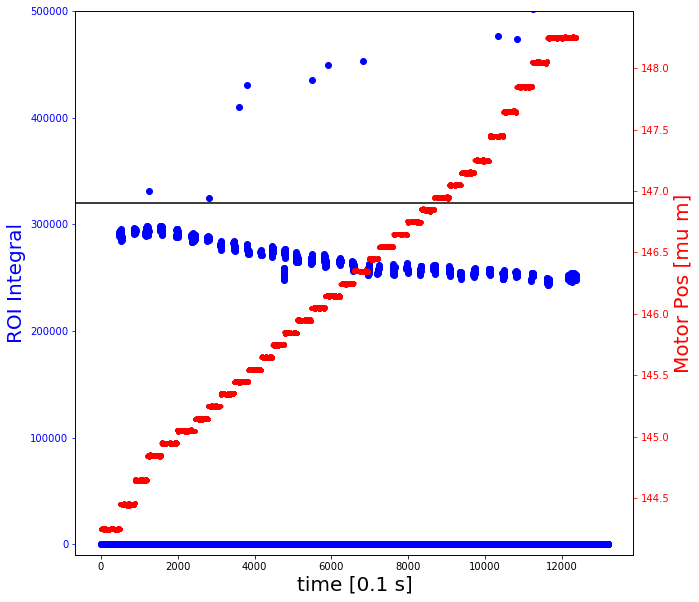

In [68]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(integral,'bo')
ax1.set_xlabel('time [0.1 s]',fontsize=20)
ax1.set_ylabel('ROI Integral', color='b', fontsize=20)
ax1.tick_params('y', colors='b')
ax1.set_ylim(-10000,500000)

plt.axhline(y=320000, color='k')

ax2 = ax1.twinx()
ax2.plot(motorPos,'r.')
ax2.set_ylabel('Motor Pos [mu m]', color='r', fontsize=20)
ax2.tick_params('y', colors='r')

plt.show()

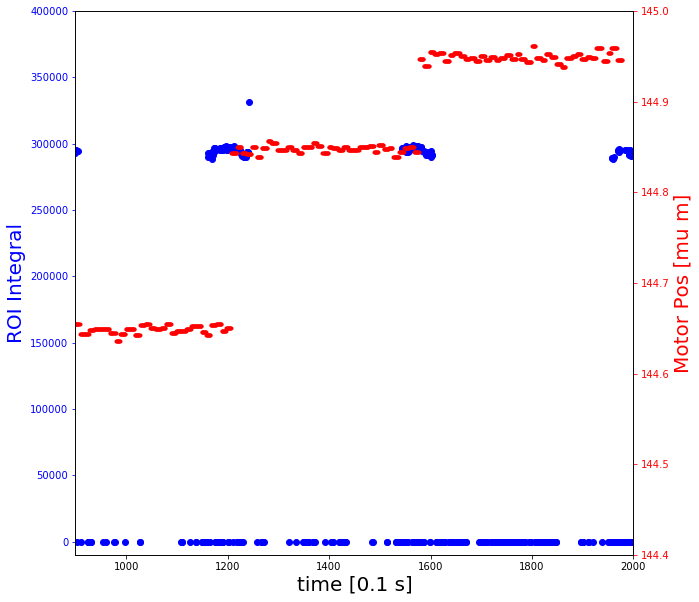

In [98]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(integral,'bo')
ax1.set_xlabel('time [0.1 s]',fontsize=20)
ax1.set_ylabel('ROI Integral', color='b', fontsize=20)
ax1.tick_params('y', colors='b')

ax1.set_ylim(-10000,400000)
ax1.set_xlim(900,2000)

ax2 = ax1.twinx()
ax2.plot(motorPos,'r.')
ax2.set_ylabel('Motor Pos [mu m]', color='r', fontsize=20)
ax2.tick_params('y', colors='r')

ax2.set_ylim(144.4,145)

plt.show()

In [43]:
logicMap = (integral>1000)
res = [i for i, val in enumerate(logicMap) if val]
print('Number of blanks in the end:', len(logicMap)-res[-1])
print('Acutal Rate in dataset (without appended blanks): % .3f '%(len(res)/res[-1]))

Number of blanks in the end: 833
Acutal Rate in dataset (without appended blanks):  0.729 


### Define Delay Steps

/software/anaconda3/5.2/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


Number of Delay Stage Steps:  33
[498, 887, 1206, 1577, 1978, 2445, 2787, 3115, 3468, 3837, 4176, 4466, 4776, 5105, 5475, 5830, 6235, 6576, 6965, 7225, 7613, 7974, 8324, 8673, 9064, 9364, 9722, 10113, 10472, 10813, 11222, 11620]


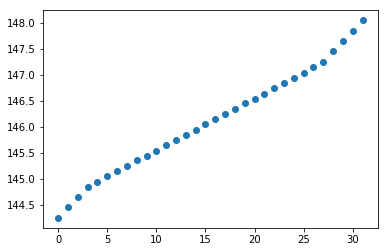

In [140]:
motorMovTreshold = 0.03

resMov = np.asarray([x -y for x,y in zip(motorPos, motorPos[1:])])
resMov = np.append(resMov,0)
changeMotorPos = ( np.abs(resMov) > motorMovTreshold)
print('Number of Delay Stage Steps: ',np.count_nonzero(changeMotorPos) +1 )

indexMotorChange = [i for i, val in enumerate(changeMotorPos) if val] 
print(indexMotorChange)

plt.plot(motorPos[changeMotorPos],'o')
plt.show()